**Dataframes to PDFs**

I'm presenting two different ways that we can output a pandas dataframe to a pdf. A familiarity with pandas and matplotlib libraries is useful but not necessary to follow along.

For this example I'm using the Iris Dataset from the sci-kit learn library.

Link to relevant section of sci-kit learn docs: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

iris_grouped_df = iris_df.groupby('target').mean().round(1)

condition_list = [iris_grouped_df.index == 0,iris_grouped_df.index == 1,iris_grouped_df.index == 2]
choice_list = ['setosa', 'versicolor', 'virginica']
iris_grouped_df['target_name'] = np.select(condition_list,choice_list,default='unknown')
iris_grouped_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
target,,,,,
0.0,5.0,3.4,1.5,0.2,setosa
1.0,5.9,2.8,4.3,1.3,versicolor
2.0,6.6,3.0,5.6,2.0,virginica


**FPDF Library**

First we'll use the FPDF Library to output our dataset to a pdf. Outputted file we'll be in

Link to docs and further tutorials: https://pyfpdf.readthedocs.io/en/latest/Tutorial/index.html

In [ ]:
!pip install fpdf
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('arial', 'B', 11)
pdf.cell(60)
pdf.cell(75, 10, 'Iris Dataset Average Measurements By Class', 0, 2, 'C')
pdf.cell(90, 10, ' ', 0, 2, 'C')
pdf.cell(-55)
columnNameList = list(iris_grouped_df.columns)
for header in columnNameList[:-1]:
  pdf.cell(35, 10, columnNameList[-1], 1, 0, 'C')
pdf.cell(35, 10, columnNameList[-1], 1, 2, 'C')
pdf.cell(-140)
pdf.set_font('arial', '', 11)
for row in range(0, len(iris_grouped_df)):
  for col_num, col_name in enumerate(columnNameList):
    if col_num != len(columnNameList)-1:
      pdf.cell(35,10, str(iris_grouped_df['%s' % (col_name)].iloc[row]), 1, 0, 'C')
    else:
      pdf.cell(35,10, str(iris_grouped_df['%s' % (col_name)].iloc[row]), 1, 2, 'C')  
      pdf.cell(-140)
pdf.output('iris_grouped_df_0.pdf', 'F')    

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40721 sha256=0749dff98feaf58d8dec9b950502ecbcc1ab039da1d44c059cad22152073b475
  Stored in directory: /root/.cache/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


''

**Matplotlib**
Now we're going to create a table image using the Matplotlib library and add it to a pdf.

Link to Matplotlib Docs: https://matplotlib.org/

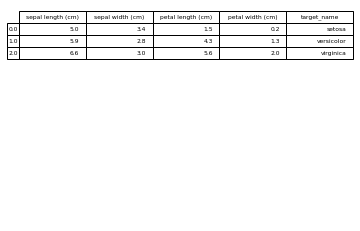

In [ ]:
from pandas.plotting import table
import matplotlib.pyplot as plt

ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(0)
ax.yaxis.set_visible(0)
table(ax, iris_grouped_df, loc='upper center')
plt.savefig('iris_grouped_df_1.pdf')